In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
from scipy.stats import norm


In [9]:
df=pd.read_csv('C:/Users/Harshith/Desktop/idsproject/auto_mpg.csv')


In [28]:
print("mean=",np.mean(df.mpg))

mean= 23.514572864321615


In [10]:
print("max value=",np.max(df.mpg))

9.0


In [43]:
print("Min value=",np.min(df.mpg))

Min value= 9.0


In [23]:
print("Median=",np.median(df.mpg))

Median= 23.0


In [24]:
print("Standard deviation=",np.std(df.mpg))

Standard deviation= 7.806159061274433


In [25]:
print("first quartile=",np.percentile(df.mpg,25))

first quartile= 17.5


In [26]:
print("third quartile=",np.percentile(df.mpg,75))

third quartile= 29.0


In [27]:
print("Inter quartile range=",np.percentile(df.mpg,75)-np.percentile(df.mpg,25))

Inter quartile range= 11.5


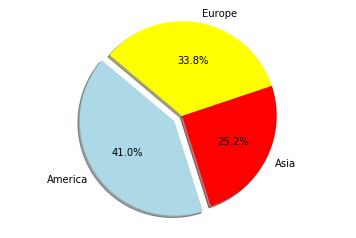

In [35]:

import matplotlib.pyplot as plt
 
# Data to plot
labels = 'America', 'Asia', 'Europe'
sizes = [164,101,135]
colors = ['lightblue', 'red', 'yellow']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

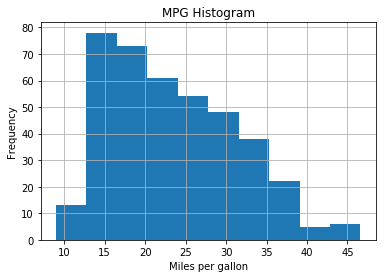

In [42]:
df['mpg'].hist(histtype='stepfilled')#, color='red')
#plt.hist(histtype='stepfilled')
plt.xlabel('Miles per gallon')
plt.ylabel('Frequency')
plt.title('MPG Histogram')
plt.show()

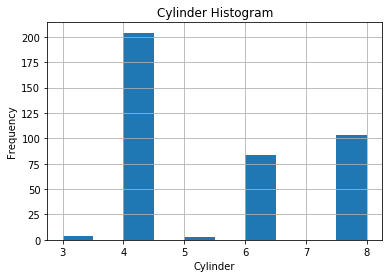

In [49]:
df['cylinders'].hist(histtype='stepfilled')#, color='red')
#plt.hist(histtype='stepfilled')
plt.xlabel('Cylinder')
plt.ylabel('Frequency')
plt.title('Cylinder Histogram')
plt.show()

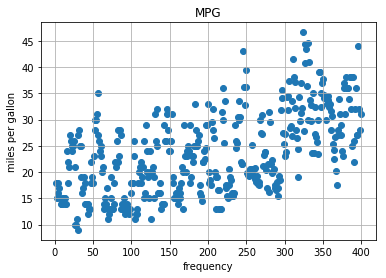

In [65]:
l = [i for i in range(2,400)]
plt.scatter(l,df['mpg']) #, df['cylinders']) #range(1,400))#, df['Weight'])
plt.xlabel('frequency')
plt.ylabel('miles per gallon')
plt.title("MPG")
plt.grid() 
plt.show()


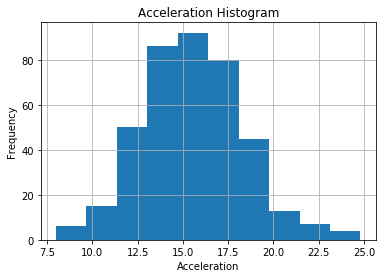

In [66]:
df['acceleration'].hist(histtype='stepfilled')#, color='red')
#plt.hist(histtype='stepfilled')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.title('Acceleration Histogram')
plt.show()

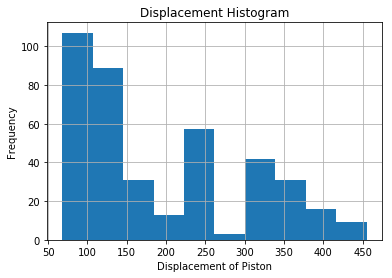

In [71]:
df['displacement'].hist(histtype='stepfilled')#, color='red')
#plt.hist(histtype='stepfilled')
plt.xlabel('Displacement of Piston')
plt.ylabel('Frequency')
plt.title('Displacement Histogram')
plt.show()

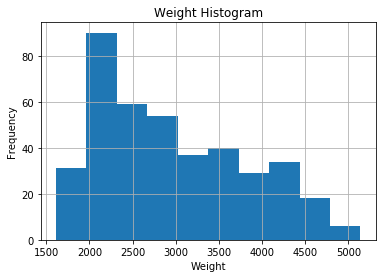

In [73]:
df['weight'].hist(histtype='stepfilled')#, color='red')
#plt.hist(histtype='stepfilled')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Histogram')
plt.show()

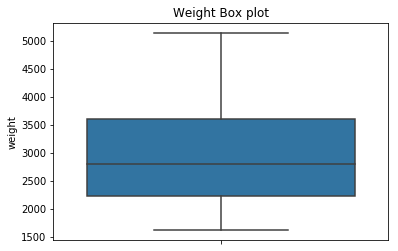

In [75]:
sns.boxplot(df['weight'], orient='v')
plt.title('Weight Box plot')
plt.show()

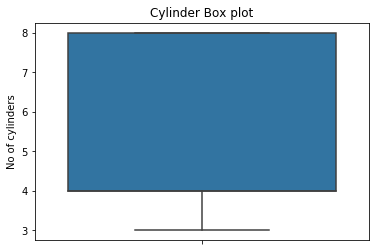

In [79]:
sns.boxplot(df['cylinders'], orient='v')
plt.title('Cylinder Box plot')
plt.ylabel('No of cylinders')
plt.show()

In [251]:
# COVARIANCE ANALYSIS
df[['mpg', 'acceleration']].cov()


,mpg,acceleration
mpg,61.089611,9.058930
acceleration,9.058930,7.604848


In [102]:
df[['mpg', 'cylinders']].cov()

,mpg,cylinders
mpg,61.089611,-10.308911
cylinders,-10.308911,2.893415


In [116]:
df[['cylinders', 'displacement']].cov()

,cylinders,displacement
cylinders,2.893415,168.623214
displacement,168.623214,10872.199152


In [117]:
df[['acceleration', 'weight']].cov()

,acceleration,weight
acceleration,7.604848,-974.899011
weight,-974.899011,717140.990526


In [119]:
#CORRELATION ANALYSIS
df[['mpg', 'acceleration']].corr()


,mpg,acceleration
mpg,1.000000,0.420289
acceleration,0.420289,1.000000


In [121]:
df[['mpg', 'cylinders']].corr()

,mpg,cylinders
mpg,1.000000,-0.775396
cylinders,-0.775396,1.000000


In [122]:
df[['cylinders', 'displacement']].corr()

,cylinders,displacement
cylinders,1.000000,0.950721
displacement,0.950721,1.000000


In [123]:
df[['acceleration', 'weight']].corr()

,acceleration,weight
acceleration,1.000000,-0.417457
weight,-0.417457,1.000000


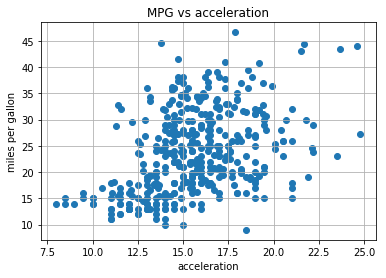

In [128]:
plt.scatter(df['acceleration'],df['mpg']) 
plt.xlabel('acceleration')
plt.ylabel('miles per gallon')
plt.title("MPG vs acceleration")
plt.grid() 
plt.show()

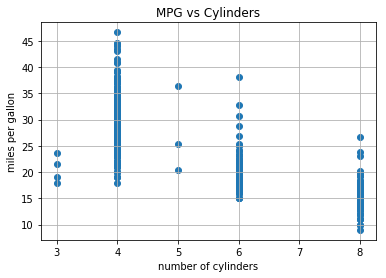

In [127]:
plt.scatter(df['cylinders'],df['mpg']) 
plt.xlabel('number of cylinders')
plt.ylabel('miles per gallon')
plt.title("MPG vs Cylinders")
plt.grid() 
plt.show()

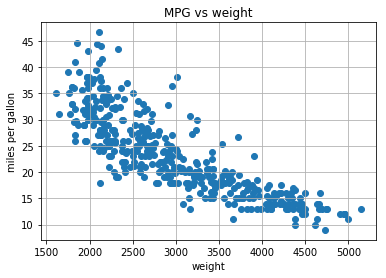

In [129]:
plt.scatter(df['weight'],df['mpg']) 
plt.xlabel('weight')
plt.ylabel('miles per gallon')
plt.title("MPG vs weight")
plt.grid() 
plt.show()

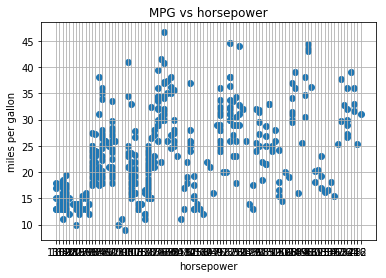

In [130]:
plt.scatter(df['horsepower'],df['mpg']) 
plt.xlabel('horsepower')
plt.ylabel('miles per gallon')
plt.title("MPG vs horsepower")
plt.grid() 
plt.show()

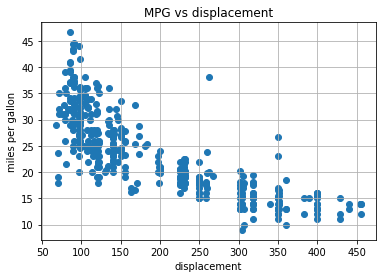

In [131]:
plt.scatter(df['displacement'],df['mpg']) 
plt.xlabel('displacement')
plt.ylabel('miles per gallon')
plt.title("MPG vs displacement")
plt.grid() 
plt.show()

proportion of ci that could cover the pop_mean 0.96


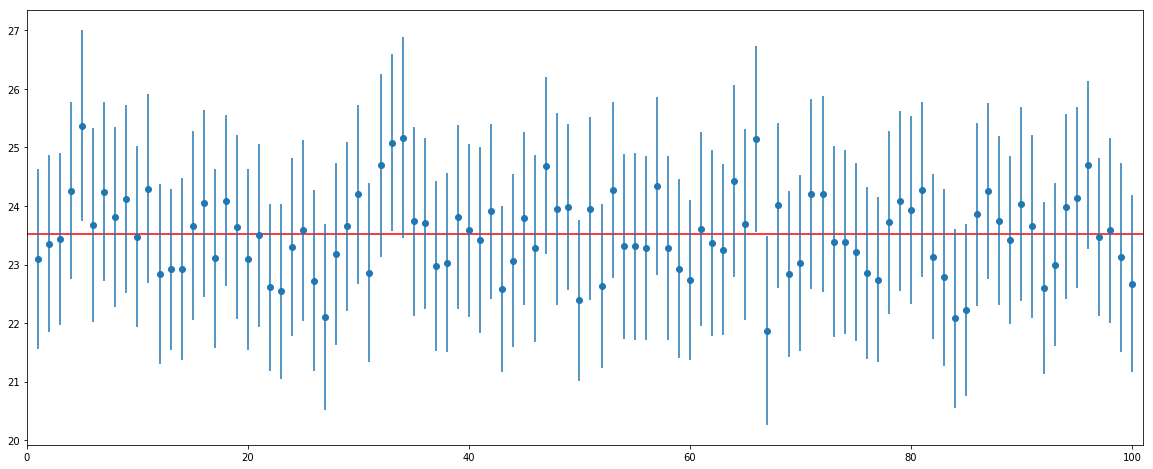

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import math
from scipy.stats import norm
pop_mean=np.mean(df.mpg)
def sampling(samp_size,no_of_sam):
    samp_means=[]
    intervals=[]
    count=0
    for i in range(no_of_sam):
        sample=df.mpg.sample(samp_size)
        samp_means.append(np.mean(sample))
        ci=norm.interval(0.95,np.mean(sample),np.std(sample,ddof=1)/math.sqrt(no_of_sam))
        intervals.append(ci)
        if pop_mean>=ci[0] and pop_mean<=ci[1]:
            count+=1
    print('proportion of ci that could cover the pop_mean',count/no_of_sam)
    plt.figure(figsize=[20,8])
    plt.hlines(y=pop_mean,xmin=0,xmax=101,colors='r')
    plt.xlim(0,101)
    plt.errorbar(range(1,101,1),samp_means,fmt='o',yerr=[(upp-low)/2 for low,upp in intervals])
    plt.show()
    
sampling(100,100)
        

In [157]:
#HYPOTHESIS TESTING

from scipy import stats
import pandas as pd
df=pd.read_csv('C:/Users/Harshith/Desktop/idsproject/auto_mpg.csv')
a=pd.DataFrame(df.mpg)
asample=pd.DataFrame(a.sample(n=10))
print(np.mean(df.mpg))

23.514572864321615


In [158]:
stats.ttest_ind(a,asample)


Ttest_indResult(statistic=array([-0.97056925]), pvalue=array([0.33234067]))

In [173]:
from scipy import stats
import pandas as pd
df=pd.read_csv('C:/Users/Harshith/Desktop/idsproject/auto_mpg.csv')
b=pd.DataFrame(df.weight)
bsample=pd.DataFrame(b.sample(n=10))
print(np.mean(df.weight))

2970.424623115578


In [174]:
stats.ttest_ind(b,bsample)

Ttest_indResult(statistic=array([-0.32583627]), pvalue=array([0.74471611]))

In [245]:
from scipy import stats
import pandas as pd
df=pd.read_csv('C:/Users/Harshith/Desktop/idsproject/auto_mpg.csv')
b=pd.DataFrame(df.acceleration)
bsample=pd.DataFrame(b.sample(n=10))
print(np.mean(df.acceleration))

15.568090452261291


In [176]:
stats.ttest_ind(b,bsample)

Ttest_indResult(statistic=array([1.49132096]), pvalue=array([0.13665379]))

In [257]:

from scipy import stats
import pandas as pd
df=pd.read_csv('C:/Users/Harshith/Desktop/idsproject/auto_mpg.csv')
b=pd.DataFrame(df.cylinders)
bsample=pd.DataFrame(b.sample(n=10))
print(np.mean(df.cylinders))

5.454773869346734


In [258]:
stats.ttest_ind(b,bsample)

Ttest_indResult(statistic=array([0.46788856]), pvalue=array([0.64011534]))

In [256]:
from scipy import stats
import pandas as pd
df=pd.read_csv('C:/Users/Harshith/Desktop/idsproject/auto_mpg.csv')
b=pd.DataFrame(df.displacement)
bsample=pd.DataFrame(b.sample(n=10))
print(np.mean(df.displacement))

193.42587939698493


In [255]:
stats.ttest_ind(b,bsample)

Ttest_indResult(statistic=array([-1.7638653]), pvalue=array([0.0785067]))

In [231]:
#linear regression

predicted MPG =  46.31736442026565 + -0.007676610063926471 *x
0.6917929800341573


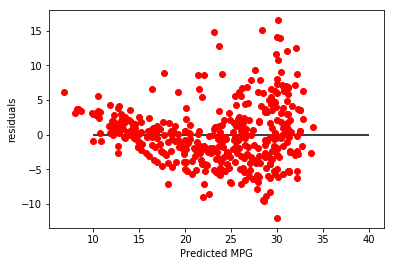

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import r2_score

#x = np.array([284.5, 407.5, 512.0, 551.0, 578.5, 697.0, 746.5])
#y = np.array([1255, 3390, 5560, 6670, 7160, 9820, 11030])

x=df['weight']
y=df['mpg']

#plt.plot(x,y,'ro')
b1 , b0 = np.polyfit(x,y, deg = 1)
print('predicted MPG = ', b0 , '+', b1,'*x')
yp = b0 + b1 * x


#coefficient of determination
print(r2_score(y,yp))

#plt.plot(y, yp, 'ro')

residuals = y - yp
plt.plot(yp, residuals, 'ro')
plt.xlabel("Predicted MPG")
plt.ylabel("residuals")
plt.hlines(0, 10, 40)

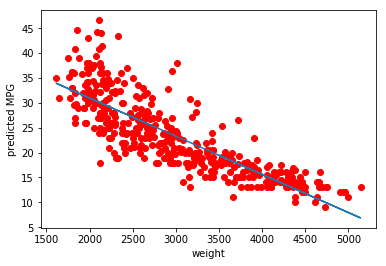

In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd



x = df["weight"]
y = df["mpg"]

b1 , b0 = np.polyfit(x,y, deg=1)
yp = b0 + b1 * x
plt.plot(x, y, 'ro')
plt.xlabel("weight")
plt.ylabel("predicted MPG")
plt.plot(x, yp)